In [1]:
# This is multiclass classification problem
from keras.datasets import mnist
dataset = mnist.load_data('mnist.db')

In [2]:
train, test = dataset

In [3]:
X_train, y_train = train

In [4]:
X_test, y_test = test

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
# 1st image
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
# Check shape 
X_train[0].shape

(28, 28)

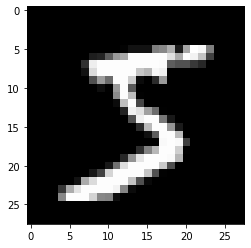

In [9]:
# Visualize
import matplotlib.pyplot as plt 
plt.imshow(X_train[0], cmap='gray')

In [10]:
print(y_train[0])  # Actual label for above image

5


In [11]:
# Convert 2D image to 1D 
X_train.shape
# 60000 records of 2D 28 X 28 shape

(60000, 28, 28)

In [12]:
# Reshaping training data
X_train_1d = X_train.reshape(60000, 28*28) 

In [13]:
X_train_1d.shape

(60000, 784)

In [14]:
# reshaping test data
X_test_1d = X_test.reshape(-1, 28*28) 

In [15]:
X_test_1d.shape

(10000, 784)

In [16]:
# convert target y to dummy variable 
from keras.utils.np_utils import to_categorical

In [17]:
y_train_cat = to_categorical(y_train)

In [18]:
# 10 different classes 0 - 9. 
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [19]:
# Creating model 
from keras.models import Sequential
model = Sequential()

In [20]:
from keras.layers import Dense

In [21]:
model.add(
    Dense(
        units = 512, #
        input_dim=28*28,
        activation="relu"
    )
)

In [22]:
model.add(
    Dense(
        units=256, 
        activation="relu"
    )
)

In [23]:
model.add(
    Dense(
        units=128, 
        activation="relu"
    )
)

In [24]:
model.add(
    Dense(
        units=64, 
        activation="relu"
    )
)

In [25]:
model.add(
    Dense(
        units=32, 
        activation="relu"
    )
)

In [26]:
model.add(
    Dense(
        units=16, 
        activation="relu"
    )
)

In [27]:
model.add(
    Dense(
        units=10, 
        activation="softmax"
    )
)

In [28]:
# Compile Model 
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [29]:
model.fit(X_train_1d, y_train_cat, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 17s 8ms/step - loss: 0.5033 - accuracy: 0.8754
Epoch 2/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1636 - accuracy: 0.9534
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1191 - accuracy: 0.9657
Epoch 4/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0937 - accuracy: 0.9724
Epoch 5/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0823 - accuracy: 0.9768
Epoch 6/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0660 - accuracy: 0.9811
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0572 - accuracy: 0.9839
Epoch 8/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0513 - accuracy: 0.9855
Epoch 9/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0432 - accuracy: 0.9880
Epoch 10/50
1875/1875 [==============================] - 12s 6ms/step - lo

In [58]:
loss = model.history.history["loss"]

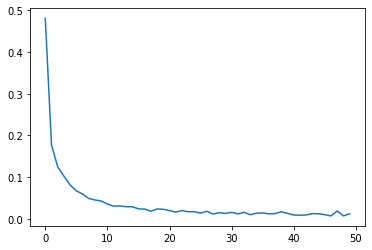

In [59]:
import matplotlib.pyplot as plt 
plt.plot(loss)

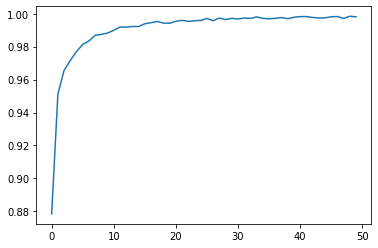

In [60]:
acc = model.history.history["accuracy"]
plt.plot(acc)

In [61]:
model.save("mnist-acc-0.9991.h5")

In [62]:
# Testing

In [63]:
imgTest = X_test[15]

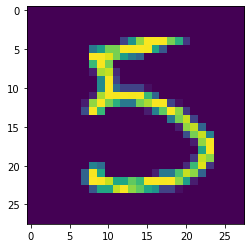

In [64]:
plt.imshow(imgTest)

In [65]:
sample = imgTest.reshape(1, 28*28)
pred = model.predict(sample)

In [66]:
pred

array([[7.1156241e-20, 6.6507418e-25, 3.5889218e-21, 1.1709591e-12,
        6.7707295e-38, 1.0000000e+00, 1.1876943e-12, 3.8703305e-23,
        5.5292390e-12, 7.3533041e-11]], dtype=float32)

In [67]:
import numpy as np 
max_val = np.amax(pred)

In [68]:
result = np.where(pred == np.amax(pred))
max(result)

array([5], dtype=int64)

In [69]:
model_predictions = model.predict(X_test_1d)

In [70]:
result = np.where(model_predictions == np.amax(model_predictions))

In [71]:
index = result[1]

In [72]:
index #Predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [73]:
y_test # actual answers

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)